<a href="https://colab.research.google.com/github/shania-mitra/PRA3500/blob/master/week1_tasks/21april/final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.1666666666666668
0.9998936848819903
The minimum probability of antibodies found in population if probability of a positive test was to be 0.5 or greater is P(A) = [0.478723404255319]


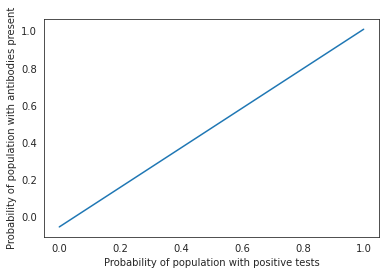

In [24]:

#Import statements
from sympy import symbols, Eq, solve
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import binom
import seaborn as sb
import sys
from scipy.stats import expon



#PROBABILITY RELATIONS
#converting tree diagram to variables
prob_no_antibodies = 0.99
prob_antibodies = 1-prob_no_antibodies
prob_true_positive = prob_antibodies*0.99
prob_false_positive = prob_no_antibodies*0.05
prob_true_negative = prob_no_antibodies*0.95
prob_false_negative = prob_antibodies*0.01
prob_positive = prob_true_positive + prob_false_positive
prob_negative = prob_false_negative + prob_true_negative

#probability of antibodies given person has positive results P(A|B)
probTest_positiveAB = (prob_true_positive)/(prob_positive)
print (probTest_positiveAB)

# probablility of no antibodies given person has negative results P(A'|B')
#using formula 2.4 obtained from Introduction to Statistics and Data Analysis for Physicists by Gerhard Bohm, Günter Zech

probTest_negativeAB = (prob_true_negative)/(prob_negative)
print(probTest_negativeAB)

#FOLLOW UP TASK

#P(A) = fraction of people with antibodies/ P(antibodies)
#P(B) = probability of kit giving positive result/P(positive)
#P(B) = 0.5 
#thus, expression obtained for P(B) is 0.5 = 0.99P(A) + 0.05(1-P(A))
#in code below, P(A) = x, solve for x:
#https://pythonforundergradengineers.com/sympy-expressions-and-equations.html

x,y = symbols('x y')
expr = 0.99*x  + 0.05*y
expr2 = expr.subs(y,1-x)
eq1 = Eq(expr2 - 0.5)
sol = solve((eq1),(x))
sol 
print('The minimum probability of antibodies found in population if probability of a positive test was to be 0.5 or greater is P(A) =', sol)

#graph



x = np.arange(0, 1, 0.00000005)
y = ((x - 0.05)/0.94)
plt.plot(x,y)
plt.xlabel('Probability of population with positive tests')
plt.ylabel('Probability of population with antibodies present')
plt.show()

In [0]:
def get_area(array, upper, lower):
  return np.sum(array[int(upper):int(lower)])/np.sum(array)

# PROBABILITY DISTRIBUTIONS

Area under graph for 0 to 500 =  0.5088
Area under graph for 0 to 1000 =  1.0
Enter lower limit for range:60
Enter upper limit for range:600
Area under graph within given range 0.5488
Enter n = bin till which you want the area: 6
area until nth bin: 0.5552


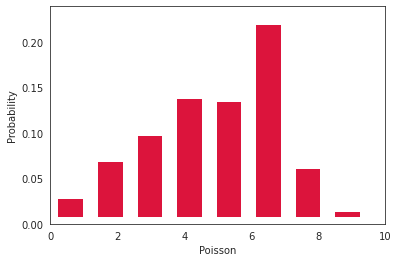

In [26]:
#PROBABILITY DISTRIBUTIONS

#Poisson Discrete Distribution - number of times an even occurs in a specific time period
#eg: predicting how many people will enter your shop on a certain day using the average number of people entering your shop over a certain time period.



sb.set_style('white')

poisson_data = poisson.rvs(mu = 5, size = 1000)
ax = sb.distplot (poisson_data , bins = 11, norm_hist=True,
                   kde = False,
                   color = 'crimson',
                   hist_kws = {"linewidth": 15, 'alpha' : 1})
ax.set(xlabel = 'Poisson', ylabel = 'Probability', xlim=(0,10))

# The array is 1000 long - if I integrate from 0 to 500 I therefore end up
# getting about 0.5 out which fits what we see
print("Area under graph for 0 to 500 = ", get_area(poisson_data,0,500))

#for entire range
#get 1.0 as expect
print("Area under graph for 0 to 1000 = ", get_area(poisson_data,0,1000))

#enter values between which you want to find probability
#if lower value greater than upper value, get 0
low_lim_disc_poiss = int(input(("Enter lower limit for range:")))
upper_lim_disc_poiss = int(input(("Enter upper limit for range:")))

print("Area under graph within given range", get_area(poisson_data,low_lim_disc_poiss,upper_lim_disc_poiss))

# if you'd want to find the area until the 6th bin, can do this:
# 11= number of bins, 6= bin until which to integrate, 1000= number of values in array
#enter value for bin you want to find area till
bin_disc_poiss = int(input("Enter n = bin till which you want the area: "))

print("area until nth bin:", get_area(poisson_data,0,(bin_disc_poiss/11)*1000))

Area under graph for 0 to 1000 =  1.0
Enter lower limit for range:60
Enter upper limit for range:600
Area under graph within given range 0.5558415841584159


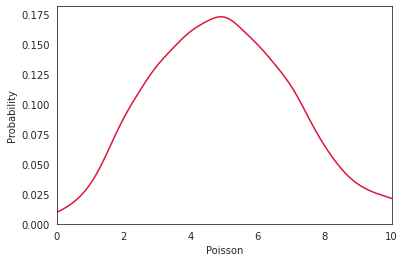

In [27]:
#Poisson continuous distribution

sb.set_style('white')

poisson_cont_data = poisson.rvs(mu = 5, size = 1000)
bx = sb.distplot (poisson_cont_data , norm_hist= True,
                   hist = False,
                   kde = True,
                   color = 'crimson',
                   hist_kws = {"linewidth": 15, 'alpha' : 1})
bx.set(xlabel = 'Poisson', ylabel = 'Probability', xlim=(0,10))

#low_lim = int(input("Enter lower limit for probability:"))
#upper_lim = int(input("Enter upper limit for probability:"))

#area_cont_poisson = np.sum(poisson_data[low_lim,upper_lim])/np.sum(poisson_data)

#print (area_cont_poisson)

#for entire range
#get 1.0 as expect
print("Area under graph for 0 to 1000 = ", get_area(poisson_cont_data,0,1000))

#enter values between which you want to find probability
low_lim_cont_poiss = int(input(("Enter lower limit for range:")))
upper_lim_cont_poiss = int(input(("Enter upper limit for range:")))

print("Area under graph within given range", get_area(poisson_cont_data,low_lim_disc_poiss,upper_lim_cont_poiss))


Area under graph for 0 to 500 =  0.49586983729662076
Area under graph for 0 to 1000 =  1.0
Enter lower limit for range:6
Enter upper limit for range:600
Area under graph for given range 0.5912390488110137
Enter n = bin till which you want the area: 6
area until nth bin: 0.5434292866082603


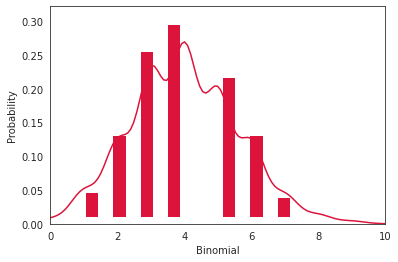

In [28]:
#Binomial Distribution


sb.set_style('white')

binom_data = binom.rvs(n = 10, p = 0.4, size = 1000)
ax = sb.distplot (binom_data , bins = 11, hist = True, kde = True, rug=False, fit=None, hist_kws={"linewidth": 15, 'alpha' : 1},
                  rug_kws=None, fit_kws=None, color = "crimson", vertical = False, norm_hist=True, axlabel=None, label=None, ax =None )
ax.set(xlabel = 'Binomial', ylabel = 'Probability', xlim=(0,10))

# The array is 1000 long - if I integrate from 0 to 500 I therefore end up
# getting about 0.5 out which fits what we see
print("Area under graph for 0 to 500 = ", get_area(binom_data,0,500))

#for entire range
#get 1.0 as expect
print("Area under graph for 0 to 1000 = ", get_area(binom_data,0,1000))

#enter values between which you want to find probability
low_lim_disc_binom = int(input(("Enter lower limit for range:")))
upper_lim_disc_binom = int(input(("Enter upper limit for range:")))

print("Area under graph for given range", get_area(binom_data,low_lim_disc_binom,upper_lim_disc_binom))

# if you'd want to find the area until the 6th bin, can do this:
# 11= number of bins, 6= bin until which to integrate, 1000= number of values in array
#enter value for bin you want to find area till
bin_disc_binom = int(input("Enter n = bin till which you want the area: "))

print("area until nth bin:", get_area(binom_data,0,(bin_disc_binom/11)*1000))


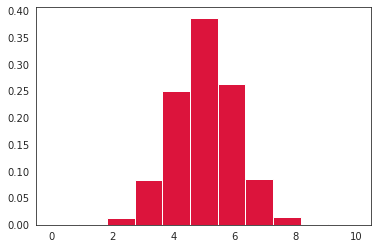

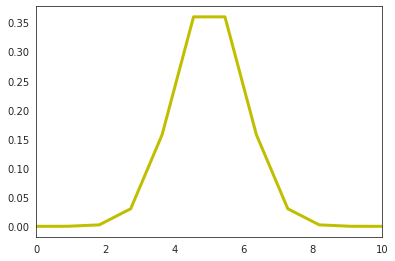

Area under graph for 0 to 500 =  0.4990126083848683
Area under graph for 0 to 1000 =  1.0
Enter lower limit for range:6
Enter upper limit for range:600
Area under graph within given graph 0.5952043780620275
Enter n = bin till which you want the area: 6
area until nth bin: 0.5449982040201358


In [29]:
#Gaussian Distribution

mean, stdev = 5, 1
data = np.random.normal(mean, stdev, 1000)
count, bins, ignored = plt.hist(data, 11, density =True, color ='crimson', range=[0,10])


#to create bins and histograms
a= plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])

axes.set_xlim([0,10])

#Plot the distribution curve 
plt.plot(bins, 1/ (stdev*np.sqrt(2*np.pi))*np.exp(-(bins - mean)**2/(2*stdev**2)), linewidth =3, color ='y')
plt.show()

# The array is 1000 long - if I integrate from 0 to 500 I therefore end up
# getting about 0.5 out which fits what we see
print("Area under graph for 0 to 500 = ", get_area(data,0,500))

#for entire range
#get 1.0 as expect
print("Area under graph for 0 to 1000 = ", get_area(data,0,1000))

#enter values between which you want to find probability
low_lim_disc_gauss = int(input(("Enter lower limit for range:")))
upper_lim_disc_gauss = int(input(("Enter upper limit for range:")))

print("Area under graph within given graph", get_area(data,low_lim_disc_gauss,upper_lim_disc_gauss))

# if you'd want to find the area until the 6th bin, can do this:
# 11= number of bins, 6= bin until which to integrate, 1000= number of values in array
#enter value for bin you want to find area till
bin_disc_gauss = int(input("Enter n = bin till which you want the area: "))

print("area until nth bin:", get_area(data,0,(bin_disc_gauss/11)*1000))


Area under graph for 0 to 500 =  0.5274804078297726
Area under graph for 0 to 1000 =  1.0
Enter lower limit for range:60
Enter upper limit for range:600
Area under graph within given range 0.5725505932200404


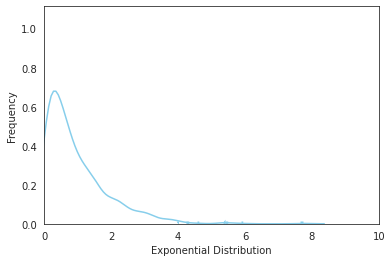

In [30]:
#Exponential Distribution


data_expon = expon.rvs(scale=1,loc=0,size=1000)

#low_lim = int(input("Enter lower limit value between 0 and 10:"))
#upper_lim = int(input("Enter upper limit value greater than lower limit and between 0 and 10:"))

#data_expon = np.sum(data_expon[low_lim:upper_lim]/np.sum(data_expon))
#print(data_area)

dx = sb.distplot(data_expon, norm_hist=True,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
dx.set(xlabel='Exponential Distribution', ylabel='Frequency', xlim = (0,10))

# The array is 1000 long - if I integrate from 0 to 500 I therefore end up
# getting about 0.5 out which fits what we see
print("Area under graph for 0 to 500 = ", get_area(data_expon,0,500))

#for entire range
#get 1.0 as expect
print("Area under graph for 0 to 1000 = ", get_area(data_expon,0,1000))

#enter values between which you want to find probability
low_lim_cont_expon = int(input(("Enter lower limit for range:")))
upper_lim_cont_expon = int(input(("Enter upper limit for range:")))

print("Area under graph within given range", get_area(data_expon,low_lim_cont_expon,upper_lim_cont_expon))

# if you'd want to find the area until the 6th bin, can do this:
# 11= number of bins, 6= bin until which to integrate, 1000= number of values in array
#enter value for bin you want to find area till
#bin_disc_binom = int(input("Enter n = bin till which you want the area: "))

#print("area until nth bin:", get_area(binom_data,0,(bin_disc_binom/11)*1000))

# EXPECTATION VALUES

In [36]:
#EXPECTATION VALUES

#Discrete Expectation for binomial distribution


def expectation_disc(distrib_type,array_size, data_type):
 
  histogram,bins = np.histogram(data_type, bins= 11)
  print("bins: ",bins)
  print("frequency ", histogram)

  event=[]
  for i in histogram:
    event.append(i)

  #expectation value = bin*probability at that particular bin, summed
  m=[]
  for i in range(10):
   m.append(event[i]*(i+1)/array_size)
  expectation=np.sum(m)
  print("Expectation value for a discrete ", distrib_type , " : ", round(expectation,2))

expectation_disc("binomial dist" , 1000, binom_data)

m = np.sum(binom_data)/len(binom_data)
print ("distribution average: ", m)

#Continuous Expectation for Poisson distribution


def expect_cont(distrib_type, array_size, data_type):

  prob = 1/array_size

sum = 0  
for i in range (0,10):
   sum += (data_type[i] * prob)
return float(sum)

expectation_cont= expect_cont("Poisson Continuous Distribution", 1000, poisson_cont_data)
print( "Expectation of continuous array E(X) is : ", expectation_cont)







bins:  [0.         0.81818182 1.63636364 2.45454545 3.27272727 4.09090909
 4.90909091 5.72727273 6.54545455 7.36363636 8.18181818 9.        ]
frequency  [  7  47 116 218 251   0 187 116  41  13   4]
Expectation value for a discrete  binomial dist  :  5.31
distribution average:  3.995


NameError: ignored

In [34]:
#Follow up task - Deal or no deal
import statistics
import numpy as np
import random
from numpy import mean
boxes = list(range(1,21))

#https://stackoverflow.com/questions/11520492/difference-between-del-remove-and-pop-on-lists
#box for not opening chosen
boxkeep_remove = random.choice(boxes)
#box for not opening removed from list
boxes.remove(boxkeep_remove)
print (boxes)
#box 1 for opening chosen
box_1_remove = random.choice(boxes)
#box 1 removed from boxes list
boxes.remove(box_1_remove)
print (boxes)
#box 2 for opening chosen
box_2_remove = random.choice(boxes)
#box 2 removed from boxes list
boxes.remove(box_2_remove)
print (boxes)
#box 3 for opening chosen
box_3_remove = random.choice(boxes)
#box 3 removed from boxes list
boxes.remove(box_3_remove)
print (boxes)
#re-add the box chosen to not open to boxes list
boxes.append(boxkeep_remove)
print("The mean value of the boxes is: " , mean(boxes))
print("However, as the boxes are numbered as whole integers, the expected box is ", np.around(mean(boxes)))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 20]
The mean value of the boxes is:  9.529411764705882
However, as the boxes are numbered as whole integers, the expected box is  10.0
